In [20]:
import pandas as pd
import seaborn as sb
pd.set_option('display.max_columns', None)
from scipy.stats import zscore
from sklearn.cluster import KMeans

In [21]:
trainDF = pd.read_csv('../outputs/train.csv')

In [22]:
trainDF = trainDF.dropna()

In [23]:
# Finalizing Indexes so we can drop state names 
trainDF = trainDF.reset_index(drop=True)
featureColumns = trainDF.columns.to_list()

In [24]:
featureColumns.remove('stateName')
featureColumns.remove('CEN_stateCode')
featureColumns.remove('Unnamed: 0')
featureColumns.remove('CEN_Unnamed: 0')
featureColumns.remove('CEN_Unnamed: 0.1')

In [25]:
stateDF = trainDF[['stateName','CEN_stateCode']]
featureDF = trainDF[featureColumns]

In [26]:
featureDF.head()

,CEN_Bachelor's Degree or Higher,CEN_Employment Rate,CEN_Hispanic or Latino (of any race),CEN_Median Household Income,CEN_Total Employer Establishments,CEN_Total Households,CEN_Total Housing Units,CEN_Total Population,CEN_Without Health Care Coverage,CP_0_diff,CP_1_diff,CP_2_diff,FD_adminAndFireResponse,FD_fireResponseOnly,FD_lessThan10kCitizens,FD_moreThan10kCitizens,FD_totalFireDepartments,HB_bed_For-Profit,HB_bed_Non-Profit,HB_bed_State/Local Government,HB_bed_Total,OB_Prevalence,S1_people_fully_vaccinated,S1_people_fully_vaccinated_per_hundred,S1_people_vaccinated,S1_people_vaccinated_per_hundred,S2_people_fully_vaccinated,S2_people_fully_vaccinated_per_hundred,S2_people_vaccinated,S2_people_vaccinated_per_hundred,S3_people_fully_vaccinated,S3_people_fully_vaccinated_per_hundred,S3_people_vaccinated,S3_people_vaccinated_per_hundred,S4_people_fully_vaccinated,S4_people_fully_vaccinated_per_hundred,S4_people_vaccinated,S4_people_vaccinated_per_hundred,SP_Governor Political Affiliation,SP_State Attorney General Political Affiliation,SP_State House Majority Political Affiliation,SP_State Senate Majority Political Affiliation
0,26.3,54.7,264047.0,51734.0,100731.0,1897576.0,2288330.0,5024279.0,9.7,222,387,625,783,20,803,87,890,0.87,0.81,1.42,3.11,39.0,219639.0,4.48,567505.0,11.57,1334176.0,27.21,1687875.0,34.42,1802279.0,36.76,2368289.0,48.30,2243092.0,45.75,2740397.0,55.89,0,0,0,0
1,30.2,59.3,49824.0,75463.0,21399.0,252199.0,326200.0,733391.0,12.2,230,353,655,181,0,181,8,189,0.36,1.55,0.29,2.20,31.9,57117.0,7.81,126381.0,17.28,268405.0,36.69,312535.0,42.72,335664.0,45.88,381619.0,52.17,391118.0,53.46,446329.0,61.01,0,0,0,0
2,30.2,56.8,2192253.0,62055.0,147163.0,2670441.0,3082000.0,7151502.0,11.3,206,393,624,151,2,153,65,218,0.47,1.36,0.11,1.93,30.9,407127.0,5.59,1110854.0,15.26,2457180.0,33.76,3197814.0,43.93,3434438.0,47.18,4069535.0,55.91,3899480.0,53.57,4496639.0,61.78,0,0,0,0
3,23.3,55.2,256847.0,48952.0,67243.0,1163647.0,1365265.0,3011524.0,9.1,227,391,610,672,20,692,56,748,0.63,2.14,0.26,3.03,36.4,130637.0,4.33,338611.0,11.22,914312.0,30.30,1168568.0,38.72,1211140.0,40.13,1573166.0,52.13,1471272.0,48.75,1788415.0,59.26,0,0,0,0
4,35.0,60.3,15579652.0,80440.0,966224.0,13157873.0,14392140.0,39538223.0,7.7,220,387,620,410,74,484,311,795,0.32,1.21,0.33,1.85,30.3,727993.0,1.84,3389906.0,8.58,16311760.0,41.28,21818408.0,55.22,21262872.0,53.81,26194546.0,66.29,24656243.0,62.40,30410779.0,76.97,1,1,1,1


In [27]:
featureDF_zscore = featureDF.apply(zscore)

In [28]:
featureDF_zscore.head()

,CEN_Bachelor's Degree or Higher,CEN_Employment Rate,CEN_Hispanic or Latino (of any race),CEN_Median Household Income,CEN_Total Employer Establishments,CEN_Total Households,CEN_Total Housing Units,CEN_Total Population,CEN_Without Health Care Coverage,CP_0_diff,CP_1_diff,CP_2_diff,FD_adminAndFireResponse,FD_fireResponseOnly,FD_lessThan10kCitizens,FD_moreThan10kCitizens,FD_totalFireDepartments,HB_bed_For-Profit,HB_bed_Non-Profit,HB_bed_State/Local Government,HB_bed_Total,OB_Prevalence,S1_people_fully_vaccinated,S1_people_fully_vaccinated_per_hundred,S1_people_vaccinated,S1_people_vaccinated_per_hundred,S2_people_fully_vaccinated,S2_people_fully_vaccinated_per_hundred,S2_people_vaccinated,S2_people_vaccinated_per_hundred,S3_people_fully_vaccinated,S3_people_fully_vaccinated_per_hundred,S3_people_vaccinated,S3_people_vaccinated_per_hundred,S4_people_fully_vaccinated,S4_people_fully_vaccinated_per_hundred,S4_people_vaccinated,S4_people_vaccinated_per_hundred,SP_Governor Political Affiliation,SP_State Attorney General Political Affiliation,SP_State House Majority Political Affiliation,SP_State Senate Majority Political Affiliation
0,-0.968909,-1.511584,-0.333137,-1.227428,-0.269943,-0.151266,-0.110762,-0.155930,0.382415,0.521445,0.320806,-0.156856,1.193913,-0.261681,1.015975,-0.054692,0.854362,1.560424,-1.275739,2.238485,0.696981,1.707524,-0.087324,-0.025042,-0.138119,-0.022446,-0.328211,-1.652342,-0.325012,-1.520338,-0.334569,-1.536888,-0.270593,-1.042222,-0.293950,-1.379463,-0.261852,-1.032395,-0.902671,-0.940540,-0.696311,-0.707107
1,-0.374309,-0.334689,-0.411491,0.888699,-0.735549,-0.813891,-0.806225,-0.752224,1.191497,0.641472,-0.658063,0.505725,-0.700141,-0.489836,-0.756485,-0.999838,-0.847277,-0.068440,-0.364425,-0.166345,-0.536288,-0.052617,-0.793684,2.114248,-0.795585,2.440402,-0.725726,-0.019335,-0.708156,-0.490369,-0.732202,-0.444919,-0.710302,-0.606352,-0.724266,-0.417777,-0.702460,-0.505625,-0.902671,-0.940540,-0.696311,-0.707107
2,-0.374309,-0.974306,0.372128,-0.307012,0.002571,0.159982,0.170549,0.139685,0.900227,0.281390,0.493547,-0.178942,-0.794530,-0.467021,-0.836274,-0.317897,-0.776882,0.282884,-0.598411,-0.549415,-0.902203,-0.300524,0.727545,0.688055,0.671707,1.569132,0.090650,-0.524051,0.095628,-0.340217,0.107946,-0.289266,0.105944,-0.185123,0.090921,-0.404056,0.075459,-0.426404,-0.902671,-0.940540,-0.696311,-0.707107
3,-1.426294,-1.383661,-0.335770,-1.475524,-0.466487,-0.446833,-0.437936,-0.435637,0.188235,0.596462,0.435967,-0.488146,0.844677,-0.261681,0.699667,-0.425572,0.509664,0.793900,0.362163,-0.230190,0.588562,1.062965,-0.474148,-0.121406,-0.479270,-0.173409,-0.484814,-1.120064,-0.469681,-0.986739,-0.494841,-1.133386,-0.446577,-0.610857,-0.473287,-1.005266,-0.444693,-0.685673,-0.902671,-0.940540,-0.696311,-0.707107
4,0.357507,-0.078843,5.268731,1.332543,4.809711,4.383472,4.179347,4.640384,-0.264850,0.491438,0.320806,-0.267286,0.020354,0.354340,0.106948,2.625215,0.623754,-0.196194,-0.783137,-0.081218,-1.010623,-0.449269,2.122107,-1.721055,4.068482,-1.312099,5.258177,0.771329,5.282973,1.060790,4.941641,0.504566,5.002869,0.983954,4.913867,0.697330,5.052630,1.136413,1.107823,1.063219,0.725324,0.942809


In [29]:
model = KMeans(8)

In [30]:
model.fit(featureDF_zscore)

KMeans()

<AxesSubplot:xlabel="CEN_Bachelor's Degree or Higher", ylabel='CEN_Employment Rate'>

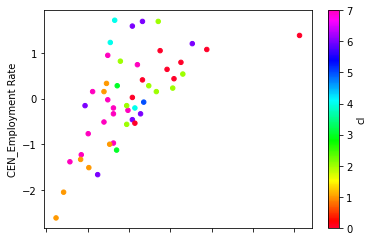

In [31]:
featureDF_zscore['cl'] = model.labels_

featureDF_zscore.plot.scatter("CEN_Bachelor's Degree or Higher", "CEN_Employment Rate", c='cl', colormap='gist_rainbow')

In [32]:
featureDF_zscore['stateName'] = stateDF['stateName']

In [33]:
for classAssignment in featureDF_zscore['cl'].unique():
    print(f'Class Assigned : {classAssignment}')
    stateInClass = featureDF_zscore[featureDF_zscore['cl']==classAssignment]['stateName'].unique()
    for state in stateInClass:
        print(state)
    print('\n')

Class Assigned : 1
Alabama
Idaho
Louisiana
Mississippi
South Carolina
West Virginia
Wyoming


Class Assigned : 7
Alaska
Arizona
Arkansas
Georgia
Indiana
Iowa
Kansas
Kentucky
Missouri
Ohio
Oklahoma
Tennessee


Class Assigned : 5
California


Class Assigned : 6
Colorado
Delaware
Nebraska
Nevada
New Mexico
Oregon
Utah


Class Assigned : 0
Connecticut
District of Columbia
Hawaii
Maine
Maryland
Massachusetts
New Hampshire
Rhode Island
Vermont


Class Assigned : 3
Florida
Texas


Class Assigned : 2
Illinois
Minnesota
New Jersey
North Carolina
Pennsylvania
Virginia
Washington
Wisconsin


Class Assigned : 4
Montana
North Dakota
South Dakota




# Hypothesis Testing 


In [35]:
import pandas as pd
import seaborn as sb
pd.set_option('display.max_columns', None)
from scipy.stats import zscore
from sklearn.cluster import KMeans

In [36]:
trainDF = pd.read_csv('../outputs/train.csv')
trainDF = trainDF.dropna()

In [37]:
trainDF.columns

Index(['Unnamed: 0', 'stateName', 'CEN_stateCode',
       'CEN_Bachelor's Degree or Higher', 'CEN_Employment Rate',
       'CEN_Hispanic or Latino (of any race)', 'CEN_Median Household Income',
       'CEN_Total Employer Establishments', 'CEN_Total Households',
       'CEN_Total Housing Units', 'CEN_Total Population', 'CEN_Unnamed: 0',
       'CEN_Unnamed: 0.1', 'CEN_Without Health Care Coverage', 'CP_0_diff',
       'CP_1_diff', 'CP_2_diff', 'FD_adminAndFireResponse',
       'FD_fireResponseOnly', 'FD_lessThan10kCitizens',
       'FD_moreThan10kCitizens', 'FD_totalFireDepartments',
       'HB_bed_For-Profit', 'HB_bed_Non-Profit',
       'HB_bed_State/Local Government', 'HB_bed_Total', 'OB_Prevalence',
       'S1_people_fully_vaccinated', 'S1_people_fully_vaccinated_per_hundred',
       'S1_people_vaccinated', 'S1_people_vaccinated_per_hundred',
       'S2_people_fully_vaccinated', 'S2_people_fully_vaccinated_per_hundred',
       'S2_people_vaccinated', 'S2_people_vaccinated_per_hundre

In [38]:
# Finalizing Indexes so we can drop state names 
trainDF = trainDF.reset_index(drop=True)
featureColumns = trainDF.columns.to_list()

In [39]:
featureColumns.remove('stateName')
featureColumns.remove('CEN_stateCode')
featureColumns.remove('Unnamed: 0')
featureColumns.remove('CEN_Unnamed: 0')
featureColumns.remove('CEN_Unnamed: 0.1')

In [40]:
profileColumns = ["CEN_Bachelor's Degree or Higher",
 'CEN_Employment Rate',
 'CEN_Hispanic or Latino (of any race)',
 'CEN_Median Household Income',
 'CEN_Total Employer Establishments',
 'CEN_Total Households',
 'CEN_Total Housing Units',
 'CEN_Total Population',
 'CEN_Without Health Care Coverage',
 'FD_adminAndFireResponse',
 'FD_fireResponseOnly',
 'FD_lessThan10kCitizens',
 'FD_moreThan10kCitizens',
 'FD_totalFireDepartments',
 'HB_bed_For-Profit',
 'HB_bed_Non-Profit',
 'HB_bed_State/Local Government',
 'HB_bed_Total',
 'OB_Prevalence',
 'SP_Governor Political Affiliation',
 'SP_State Attorney General Political Affiliation',
 'SP_State House Majority Political Affiliation',
 'SP_State Senate Majority Political Affiliation']

covidColumns = [ 'CP_0_diff',
 'CP_1_diff',
 'CP_2_diff',
 'S1_people_fully_vaccinated',
 'S1_people_fully_vaccinated_per_hundred',
 'S1_people_vaccinated',
 'S1_people_vaccinated_per_hundred',
 'S2_people_fully_vaccinated',
 'S2_people_fully_vaccinated_per_hundred',
 'S2_people_vaccinated',
 'S2_people_vaccinated_per_hundred',
 'S3_people_fully_vaccinated',
 'S3_people_fully_vaccinated_per_hundred',
 'S3_people_vaccinated',
 'S3_people_vaccinated_per_hundred',
 'S4_people_fully_vaccinated',
 'S4_people_fully_vaccinated_per_hundred',
 'S4_people_vaccinated',
 'S4_people_vaccinated_per_hundred']

In [41]:
# Creating the 2 kmeans bunches
profileDF = trainDF[profileColumns]
covidDF = trainDF[covidColumns]

In [43]:
# Standardize 
profileDF = profileDF.apply(zscore)
covidDF = covidDF.apply(zscore)

In [45]:
K = 8
model = KMeans(K)
model2 = KMeans(K)


model.fit(profileDF)
model2.fit(profileDF)
profileDF['cl'] = model.labels_
covidDF['cl'] = model2.labels_

In [48]:
covidDF['stateName'] = stateDF['stateName']
profileDF['stateName'] = stateDF['stateName']

In [54]:
profileDF

,CEN_Bachelor's Degree or Higher,CEN_Employment Rate,CEN_Hispanic or Latino (of any race),CEN_Median Household Income,CEN_Total Employer Establishments,CEN_Total Households,CEN_Total Housing Units,CEN_Total Population,CEN_Without Health Care Coverage,FD_adminAndFireResponse,FD_fireResponseOnly,FD_lessThan10kCitizens,FD_moreThan10kCitizens,FD_totalFireDepartments,HB_bed_For-Profit,HB_bed_Non-Profit,HB_bed_State/Local Government,HB_bed_Total,OB_Prevalence,SP_Governor Political Affiliation,SP_State Attorney General Political Affiliation,SP_State House Majority Political Affiliation,SP_State Senate Majority Political Affiliation,cl,stateName
0,-0.968909,-1.511584,-0.333137,-1.227428,-0.269943,-0.151266,-0.110762,-0.155930,0.382415,1.193913,-0.261681,1.015975,-0.054692,0.854362,1.560424,-1.275739,2.238485,0.696981,1.707524,-0.902671,-0.940540,-0.696311,-0.707107,1,Alabama
1,-0.374309,-0.334689,-0.411491,0.888699,-0.735549,-0.813891,-0.806225,-0.752224,1.191497,-0.700141,-0.489836,-0.756485,-0.999838,-0.847277,-0.068440,-0.364425,-0.166345,-0.536288,-0.052617,-0.902671,-0.940540,-0.696311,-0.707107,4,Alaska
2,-0.374309,-0.974306,0.372128,-0.307012,0.002571,0.159982,0.170549,0.139685,0.900227,-0.794530,-0.467021,-0.836274,-0.317897,-0.776882,0.282884,-0.598411,-0.549415,-0.902203,-0.300524,-0.902671,-0.940540,-0.696311,-0.707107,4,Arizona
3,-1.426294,-1.383661,-0.335770,-1.475524,-0.466487,-0.446833,-0.437936,-0.435637,0.188235,0.844677,-0.261681,0.699667,-0.425572,0.509664,0.793900,0.362163,-0.230190,0.588562,1.062965,-0.902671,-0.940540,-0.696311,-0.707107,1,Arkansas
4,0.357507,-0.078843,5.268731,1.332543,4.809711,4.383472,4.179347,4.640384,-0.264850,0.020354,0.354340,0.106948,2.625215,0.623754,-0.196194,-0.783137,-0.081218,-1.010623,-0.449269,1.107823,1.063219,0.725324,0.942809,2,California
5,1.531461,1.200391,0.032385,1.037093,0.161593,-0.015337,-0.038784,-0.051783,-0.167761,-0.545974,-0.467021,-0.611155,-0.210222,-0.563266,-0.004563,-0.918603,0.025191,-1.010623,-1.961503,1.107823,1.063219,0.725324,0.942809,0,Colorado
6,1.089323,0.432851,-0.201738,1.189232,-0.339286,-0.360845,-0.379477,-0.353032,-0.847389,-0.794530,0.091961,-0.696643,0.136730,-0.565694,-1.218226,0.103547,-0.677105,-0.766679,-0.721967,1.107823,1.063219,0.725324,0.942809,0,Connecticut
7,0.083076,-0.462613,-0.391570,0.417210,-0.707712,-0.763937,-0.762793,-0.716571,-0.620846,-1.153204,-0.489836,-1.166830,-0.808416,-1.157990,-1.090472,0.349848,-0.783513,-0.576945,1.087756,1.107823,1.063219,0.725324,0.942809,6,Delaware
8,4.123309,1.379484,-0.401313,2.387173,-0.720325,-0.798035,-0.797660,-0.758317,-1.624108,-1.269616,-0.489836,-1.272265,-1.083585,-1.303637,1.911748,2.073956,-0.783513,2.594318,-1.936712,1.107823,1.063219,3.568592,0.942809,3,District of Columbia
9,-0.298078,-1.127814,1.654119,-0.559210,2.510719,2.268374,2.574858,2.138965,1.515129,-0.580583,0.844874,-0.314795,1.201515,-0.024374,1.496547,-0.623041,0.089036,-0.007744,-0.920292,-0.902671,-0.940540,-0.696311,-0.707107,2,Florida


In [51]:
for classAssignment in profileDF['cl'].unique():
    print(f'Class Assigned : {classAssignment}')
    stateInClass = profileDF[profileDF['cl']==classAssignment]['stateName'].unique()
    for state in stateInClass:
        print(state)
    print('\n')

Class Assigned : 1
Alabama
Arkansas
Georgia
Indiana
Iowa
Kansas
Kentucky
Louisiana
Mississippi
Missouri
Ohio
Oklahoma
South Carolina
Tennessee
West Virginia


Class Assigned : 4
Alaska
Arizona
Idaho
Nevada
New Hampshire
New Mexico
Utah
Wyoming


Class Assigned : 2
California
Florida
Texas


Class Assigned : 0
Colorado
Connecticut
Illinois
Maryland
Massachusetts
Minnesota
New Jersey
Virginia
Washington
Wisconsin


Class Assigned : 6
Delaware
Hawaii
Maine
Nebraska
Oregon
Rhode Island
Vermont


Class Assigned : 3
District of Columbia


Class Assigned : 7
Montana
North Dakota
South Dakota


Class Assigned : 5
North Carolina
Pennsylvania




In [52]:
for classAssignment in covidDF['cl'].unique():
    print(f'Class Assigned : {classAssignment}')
    stateInClass = covidDF[covidDF['cl']==classAssignment]['stateName'].unique()
    for state in stateInClass:
        print(state)
    print('\n')

Class Assigned : 2
Alabama
Arkansas
Georgia
Indiana
Iowa
Kansas
Kentucky
Louisiana
Mississippi
Missouri
Oklahoma
South Carolina
Tennessee
West Virginia


Class Assigned : 3
Alaska
Arizona
Idaho
Nevada
New Hampshire
New Mexico
Utah
Wyoming


Class Assigned : 5
California


Class Assigned : 1
Colorado
Connecticut
Delaware
Hawaii
Maine
Maryland
Massachusetts
Minnesota
Nebraska
New Jersey
Oregon
Rhode Island
Vermont
Virginia
Washington
Wisconsin


Class Assigned : 6
District of Columbia


Class Assigned : 4
Florida
Texas


Class Assigned : 0
Illinois
North Carolina
Ohio
Pennsylvania


Class Assigned : 7
Montana
North Dakota
South Dakota


